In [2]:
import import_ipynb
from plot_nca_dim_reduction import *

In [3]:
pca = PCA(n_components=100)
X_embedded = pca.fit_transform(X)
print(X_embedded.shape)
pd.DataFrame(X_embedded)

X_embedded_train = X_embedded[:17184]
X_embedded_test = X_embedded[17184:]



(21480, 100)


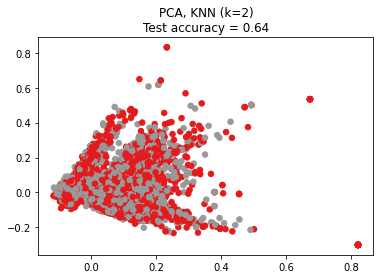

In [4]:
# defining constants
n_neighbors = 2
random_state = 0

# Use a nearest neighbor classifier to evaluate the methods
knn = KNeighborsClassifier(n_neighbors=n_neighbors)

# plt.figure()
plt.figure()
# plt.subplot(1, 3, i + 1, aspect=1)

X_train, X_test, y_train, y_test = train_test_split(
    X_embedded_train, y, test_size=0.5, stratify=y, random_state=random_state
)

# Fit a nearest neighbor classifier on the embedded training set
knn.fit(X_train, y_train)

# Compute the nearest neighbor accuracy on the embedded test set
acc_knn = knn.score(X_test, y_test)

# Plot the projected points and show the evaluation score
plt.scatter(X_embedded_train[:, 0], X_embedded_train[:, 1], c=y, s=30, cmap="Set1")
plt.title(
    "{}, KNN (k={})\nTest accuracy = {:.2f}".format('PCA', n_neighbors, acc_knn)
)
plt.show()


In [5]:
knn1 = KNeighborsClassifier(n_neighbors=n_neighbors)
knn1.fit(X_embedded_train, y)
output=knn1.predict(X_embedded_test)
output = pd.DataFrame(output).set_index(df_test["id"])

output
output.to_csv("outputPCA.csv")

In [6]:
import import_ipynb
import Task1

importing Jupyter notebook from Task1.ipynb


In [7]:
X_train_LR, X_test_LR, y_train_LR, y_test_LR = train_test_split(
    X_embedded_train, y, test_size=0.5, stratify=y, random_state=random_state
)

theta, theta_0, losses = Task1.train(X_embedded_train, y, 100, 1000, 0.01)
print(theta_0)
pd.DataFrame(theta)

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 

KeyboardInterrupt: 

In [ ]:
y_pred = Task1.predict(X_embedded_test, theta, theta_0)

pd.DataFrame(y_pred).set_index(df_test["id"]).to_csv("outputPCA.csv")
pd.DataFrame(np.append(theta, [[theta_0]], axis=0)).to_csv("predictorsPCA.csv")

In [ ]:
print(Task1.accuracy(y_test_LR, Task1.predict(X_test_LR, theta, theta_0)))